In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

In [2]:
# Import dataset
data_df = pd.read_csv("./Online Retail.csv", encoding="unicode_escape")
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# check shape
data_df.shape

(541909, 8)

In [4]:
# Customer distribution by country
country_cust_data = data_df[ ['Country', 'CustomerID'] ].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values("CustomerID",ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [5]:
# Keep only United Kingdom data
data_df = data_df.query("Country=='United Kingdom'").reset_index(drop=True)

In [6]:
# Check for missing values in the dataset
data_df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [7]:
# Remove missing values from CustomerID column, can ignore missing values in description column
data_df = data_df[pd.notnull(data_df['CustomerID'])]

# Validate if there are any negative values in Quantity colum
data_df.Quantity.min()

-80995

In [8]:
# Validate if there are any negative values in UnitPrice colum
data_df.UnitPrice.min()

0.0

In [9]:
# Filter out records with negative values
data_df = data_df[(data_df['Quantity'] > 0)]

In [10]:
# Convert the string date field to datetime
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])

In [11]:
# Add new column depicting total amount
data_df['TotalAmount'] = data_df['Quantity'] * data_df['UnitPrice']

In [12]:
# Check the shape 
data_df.shape

(354345, 9)

In [13]:
data_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8
495477,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.8


In [14]:
# data_df['InvoiceDate'].min()

In [15]:
# datetime(2011,12,10)

<h1 style="color: red">RFM Modelling</h1>

In [16]:
# Recency = Latest Date - Last Invoice Data, Frequency = count of invoice no. of transaction(s), Monetary = sum of total amt for each customer
from datetime import datetime
from datetime import timedelta  

# Set latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent 
Latest_Date = data_df['InvoiceDate'].max() + timedelta(days=1)  

# Create RFM Modelling scores for each customer
RFMScores = data_df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), "TotalAmount": lambda x: x.sum()})

# Covert column Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

# Rename column names to Recency,Frequency and Monetary
RFMScores.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalAmount": "Monetary"}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,1,4596,33719.73
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


In [17]:
# Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: Recency, dtype: float64

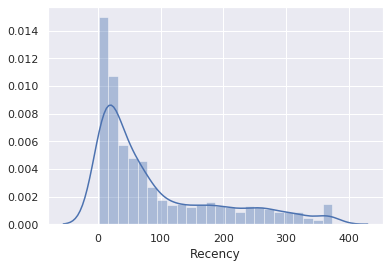

In [23]:
# Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [20]:
# Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

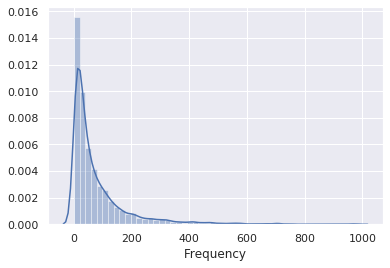

In [21]:
# Frequency distribution plot, taking observations which have a frequency less that 1000
xf = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(xf)

In [22]:
# Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

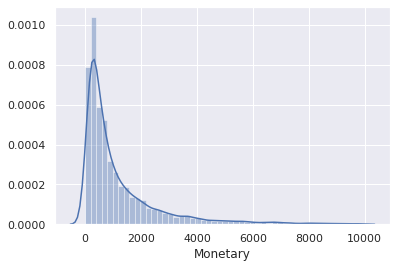

In [23]:
# Frequency distribution plot, taking observations which have a frequency less that 10000
xm = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(xm)

In [24]:
# Split inot four segments using quantile
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [25]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1 #lowest value of recency
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 # highest freq and monetary value

In [26]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,1,4596,33719.73,1,1,1
12749.0,4,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [27]:
# cal and add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

# Cal and add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', "M"]].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,1,4596,33719.73,1,1,1,111,3
12749.0,4,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [38]:
RFMScores.RFMScore

CustomerID
12346.0     9
12747.0     3
12748.0     3
12749.0     3
12820.0     5
           ..
18280.0    12
18281.0    12
18282.0     9
18283.0     3
18287.0     5
Name: RFMScore, Length: 3921, dtype: int64

In [39]:
# Assign loyalty level to each customer
Loyalty_Level = ['Platinum', "Gold", "Silver", "Bronze"]
Score_cuts = pd.qcut(RFMScores.RFMScore, q=4,)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,326,1,77183.60,4,4,1,441,9,"(8.0, 10.0]"
1,12747.0,2,103,4196.01,1,1,1,111,3,"(2.999, 5.0]"
2,12748.0,1,4596,33719.73,1,1,1,111,3,"(2.999, 5.0]"
3,12749.0,4,199,4090.88,1,1,1,111,3,"(2.999, 5.0]"
4,12820.0,3,59,942.34,1,2,2,122,5,"(2.999, 5.0]"


In [53]:
# Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup'] == '211'].sort_values("Monetary", ascending=False).reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,16029.0,39,242,81024.84,2,1,1,211,4,Platinum
1,14680.0,25,258,28754.11,2,1,1,211,4,Platinum
2,15513.0,33,308,14758.22,2,1,1,211,4,Platinum
3,17340.0,30,407,12353.29,2,1,1,211,4,Platinum
4,15125.0,25,127,11528.48,2,1,1,211,4,Platinum


In [34]:
pd.__version__

'1.0.1'